# Capstone Project: Road Signs Identification using a Neural Network

### Dataset Used: **Kaggle gtsrb-traffic-sign Dataset** 

### Objectives: 
- Data Preprocessing and Model Building<br>
- Training & Testing of the model<br>
- Designing and Testing the GUI


#### Authors: `Chitrang Juneja`    &emsp; &emsp;  `Pranay Redyy` &emsp; &emsp; `Debashis Garai`&emsp; &emsp;  `Utkarsh Gangwar`<br><br>&emsp; &emsp; &emsp; &emsp; &ensp;  `18BCS6115` &emsp; &emsp; &emsp; &emsp; `18BCS6100` &emsp; &emsp; &emsp; &ensp; `18BCS6054` &emsp; &emsp; &emsp; &ensp; &ensp; `18BCS3777`


**Importing warnings to be warned of situations that aren’t necessarily exceptions**

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Importing the required libraries for our analysis**

In [2]:
import numpy as np                               #basically an array
import pandas as pd                              #reading and analyze csv
import matplotlib.pyplot as plt                  #data visualisation
import cv2                                       #comp. vision, image processing, uses numpy as images are 2D array(matrices)
import tensorflow as tf                          #creating neural network (collect, build, train, evaluate, predict)
from PIL import Image                            #manipulate images in python
import os                                        #directory control
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical           #one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                     #progress bar

**Importing the dataset from the remote location and resizing the images**

In [3]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'train',str(i))
    images = os.listdir(path)
    
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#### Converting lists into numpy arrays bcoz its faster and takes lesser memory

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape) 

(39209, 30, 30, 3) (39209,)


Total Images:39209 of size (30x30x3(3 Means Color))

 **Peaking into the data**

In [6]:
data[39000]

array([[[17, 17, 19],
        [18, 18, 19],
        [18, 17, 18],
        ...,
        [20, 19, 23],
        [21, 19, 21],
        [21, 20, 21]],

       [[17, 19, 23],
        [18, 19, 20],
        [19, 19, 20],
        ...,
        [22, 21, 22],
        [24, 23, 24],
        [21, 21, 22]],

       [[20, 24, 26],
        [16, 18, 20],
        [17, 18, 20],
        ...,
        [20, 19, 21],
        [21, 20, 21],
        [19, 19, 19]],

       ...,

       [[20, 20, 25],
        [19, 19, 24],
        [19, 18, 23],
        ...,
        [30, 28, 32],
        [19, 22, 27],
        [18, 19, 24]],

       [[19, 19, 24],
        [17, 17, 22],
        [18, 17, 22],
        ...,
        [22, 26, 31],
        [18, 25, 31],
        [18, 24, 31]],

       [[16, 17, 21],
        [16, 16, 20],
        [17, 16, 21],
        ...,
        [46, 56, 74],
        [43, 54, 73],
        [42, 53, 73]]], dtype=uint8)

In [7]:
labels[4900]

3

### Splitting the Data into Training and Testing Sets
The very basic step towards our model building is to perfrom a train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


#### Converting the labels into one hot encoding to make it more useful and expressive

In [9]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [10]:
y_train[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Model Building and Evaluation

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

#### Final training of the model

In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
981/981 [==============================] - 40s 40ms/step - loss: 2.0170 - accuracy: 0.4854 - val_loss: 0.4531 - val_accuracy: 0.8791
Epoch 2/2
981/981 [==============================] - 41s 41ms/step - loss: 0.5704 - accuracy: 0.8334 - val_loss: 0.1467 - val_accuracy: 0.9642


#### Saving the model to use it for GUI image classification stage

In [15]:
model.save("Traffic_signs_model.h5")

#### Applying the model and plotting graphs for accuracy 

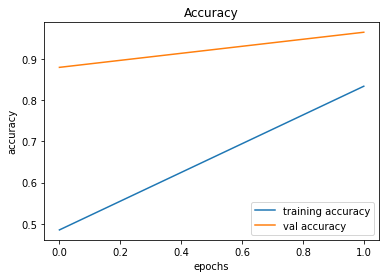

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Now applying the model again and plotting graphs for loss 

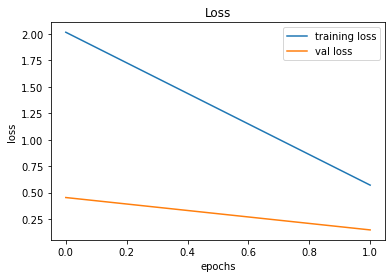

In [17]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Testing accuracy on test dataset

In [18]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred=model.predict(X_test) 
classes=np.argmax(pred,axis=1)

#### Accuracy with the test data

In [19]:
print(accuracy_score(labels, classes))

0.9265241488519398


**We have got an accuracy of `92.6%` for our model, which allows us to safely conclude that our model will work just fine in the real-time environment, though maximizing it is part of our future scope.**

## Graphical User Interface (GUI)

#### Importing the other libraries required for GUI designing

In [5]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from keras.models import load_model
import numpy

In [6]:
model = load_model('Traffic_signs_model.h5')
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Dictionary to label all traffic signs class

In [7]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

#### Designing a user-friendly GUI using tkinter library, which accepts the model and produces the required results

In [8]:
window=tk.Tk()
window.geometry('600x500')
window.title('Traffic sign classifier')

window.configure(background='#1e3e64')

heading = Label(window, text="Traffic Sign Classifier",padx=220, font=('Verdana',20,'bold'))
heading.configure(background='#143953',foreground='white')
heading.pack()

sign = Label(window)
sign.configure(background='#1e3e64')

value = Label(window,font=('Helvetica',15,'bold'))
value.configure(background='#1e3e64')

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    pred_x = model.predict([image]) 
    pred=numpy.argmax(pred_x,axis=1)[0]
    sign = classes[pred+1]
    print(sign)
    value.configure(foreground='#ffffff', text=sign)

def show_cb(file_path):
    classify_b=Button(window,text="Classify Image",command=lambda: classify(file_path),padx=20,pady=5)
    classify_b.configure(background='#147a81', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.6,rely=0.80)
    
def uploader():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((window.winfo_width()/2.25),(window.winfo_height()/2.25)))
        im = ImageTk.PhotoImage(uploaded)
        
        sign.configure(image=im)
        sign.image=im
        value.configure(text='')
        show_cb(file_path)
    except:
        pass

upload = Button(window,text="Upload an image",command=uploader,padx=10,pady=5)
upload.configure(background='#e8d08e', foreground='#143953',font=('arial',10,'bold'))
upload.pack()
upload.place(x=100, y=400)

sign.pack()
sign.place(x=230,y=100)
value.pack()
value.place(x=240,y=300)

window.mainloop()